In [1]:
import os
import cv2
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = 'C:/Users/NJS/Desktop/CVPR Final Assignment/Dataset'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'Train')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'Test')

In [3]:
IMG_SIZE = 255
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['Aurko', 'Masum', 'Shamim']


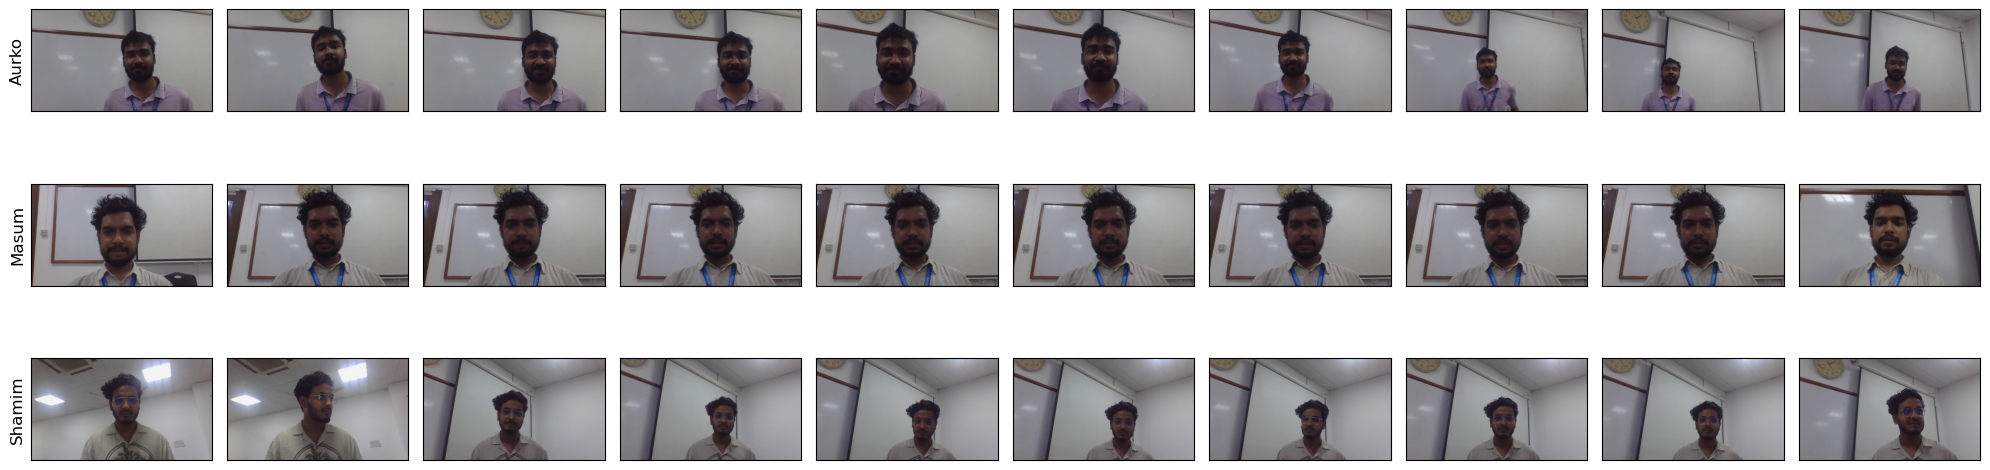

In [4]:
plt.figure(figsize=(20, len(CATEGORIES) * 2))  # Adjust figure size based on the number of categories
i = 0
for idx, c in enumerate(CATEGORIES):
    path = os.path.join(TRAIN_DATA_DIR, c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display
        plt.subplot(len(CATEGORIES), 10, i + 1)  # Create a grid with rows equal to the number of categories
        plt.imshow(img_array)
        if i % 10 == 0:
            plt.ylabel(c, fontsize=12)  # Add category label to the left of each row
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i % 10 == 0:
            break

plt.tight_layout()
plt.show()

In [5]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) # 
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            training_data.append([img_resized, class_num]) 
        except WException as e:
            pass
        
print(len(training_data))

100%|██████████| 61/61 [00:00<00:00, 305.04it/s]


183


In [6]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            test_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(test_data))

100%|██████████| 15/15 [00:00<00:00, 310.45it/s]

45


In [7]:
random.shuffle(training_data)
random.shuffle(test_data)

In [8]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,255,255,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (183, 255, 255, 3) Y_train= (183,)


In [9]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (45, 255, 255, 3) Y_test= (45,)


In [10]:
X_train, X_test = X_train / 255.0, X_test / 255.0


In [11]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(255,255,3)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 251, 251, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 123, 123, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,444,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,502,851 (13.36 MB)

 Trainable params: 3,502,851 (13.36 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tqdm.keras import TqdmCallback

# Define a callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model with tqdm and save the best model
h = model.fit(
    x=X_train, 
    y=Y_train, 
    epochs=30, 
    validation_split=0.2, 
    batch_size=32, 
    callbacks=[TqdmCallback(verbose=1), checkpoint]
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.3523 - loss: 1.4337
Epoch 1: val_accuracy improved from -inf to 0.29730, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 511ms/step - accuracy: 0.3507 - loss: 1.4289 - val_accuracy: 0.2973 - val_loss: 1.0803
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.3894 - loss: 1.0623
Epoch 2: val_accuracy improved from 0.29730 to 0.40541, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 456ms/step - accuracy: 0.3964 - loss: 1.0609 - val_accuracy: 0.4054 - val_loss: 0.9679
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.5351 - loss: 0.9271
Epoch 3: val_accuracy improved from 0.40541 to 0.75676, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 463ms/step - accuracy: 0.5464 - loss: 0.9217 - val_accuracy: 0.7568 - val_loss: 0.7668
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.8017 - loss: 0.6179
Epoch 4: val_accuracy did not improve from 0.75676
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step - accuracy: 0.7937 - loss: 0.6207 - val_accuracy: 0.6757 - val_loss: 0.6494
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.7696 - loss: 0.5119
Epoch 5: val_accuracy did not improve from 0.75676
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 463ms/step - accuracy: 0.7783 - loss: 0.5017 - val_accuracy: 0.7027 - val_loss: 0.5243
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.8908 - loss: 0.3012
Epoch 6: val_accuracy did not improve from 0.75676
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.8862 - loss: 0.3089 - val_accuracy: 0.6757 - val_loss: 0.7787
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.8528 - loss: 0.2829
Epoch 7: val_accuracy did not improve from 0.75676


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.9443 - loss: 0.1717 - val_accuracy: 0.8649 - val_loss: 0.3237
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.9695 - loss: 0.0831
Epoch 9: val_accuracy improved from 0.86486 to 0.89189, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 454ms/step - accuracy: 0.9700 - loss: 0.0811 - val_accuracy: 0.8919 - val_loss: 0.3967
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.9919 - loss: 0.0385
Epoch 10: val_accuracy improved from 0.89189 to 0.94595, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 455ms/step - accuracy: 0.9921 - loss: 0.0383 - val_accuracy: 0.9459 - val_loss: 0.2039
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.9986 - loss: 0.0334
Epoch 11: val_accuracy did not improve from 0.94595
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.9977 - loss: 0.0331 - val_accuracy: 0.9189 - val_loss: 0.3330
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 1.0000 - loss: 0.0056
Epoch 12: val_accuracy did not improve from 0.94595
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.9189 - val_loss: 0.3758
Epoch 13/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 1.0000 - loss: 0.0037
Epoch 13: val_accuracy did not improve from 0.94595
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 434ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.9459 - val_loss: 0.3285
Epoch 14/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 14: val_accuracy did not improve from 

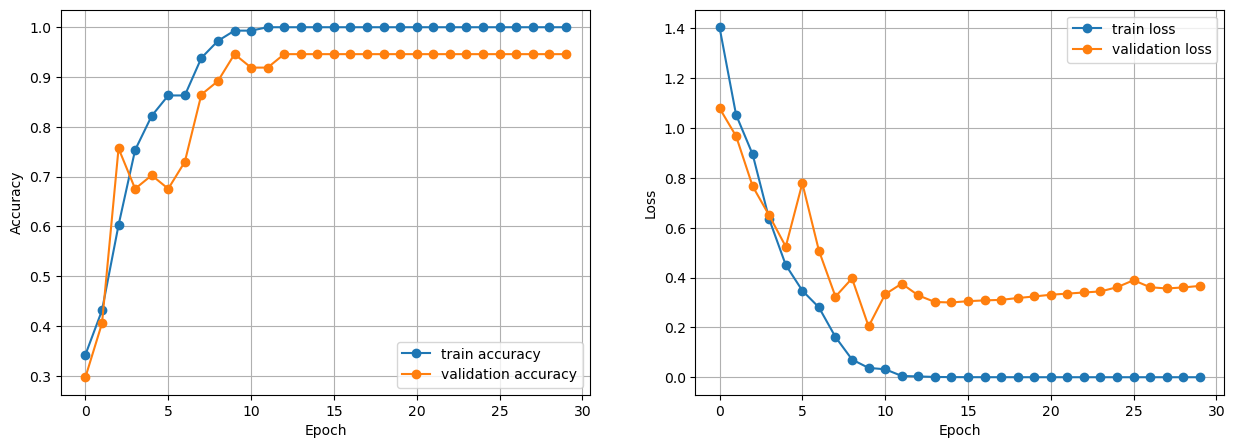

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [15]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9199 - loss: 0.5606

Test Accuracy: 0.9111111164093018

Test Loss: 0.5445709824562073


In [16]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [17]:
np.argmax(predictions[0])

2

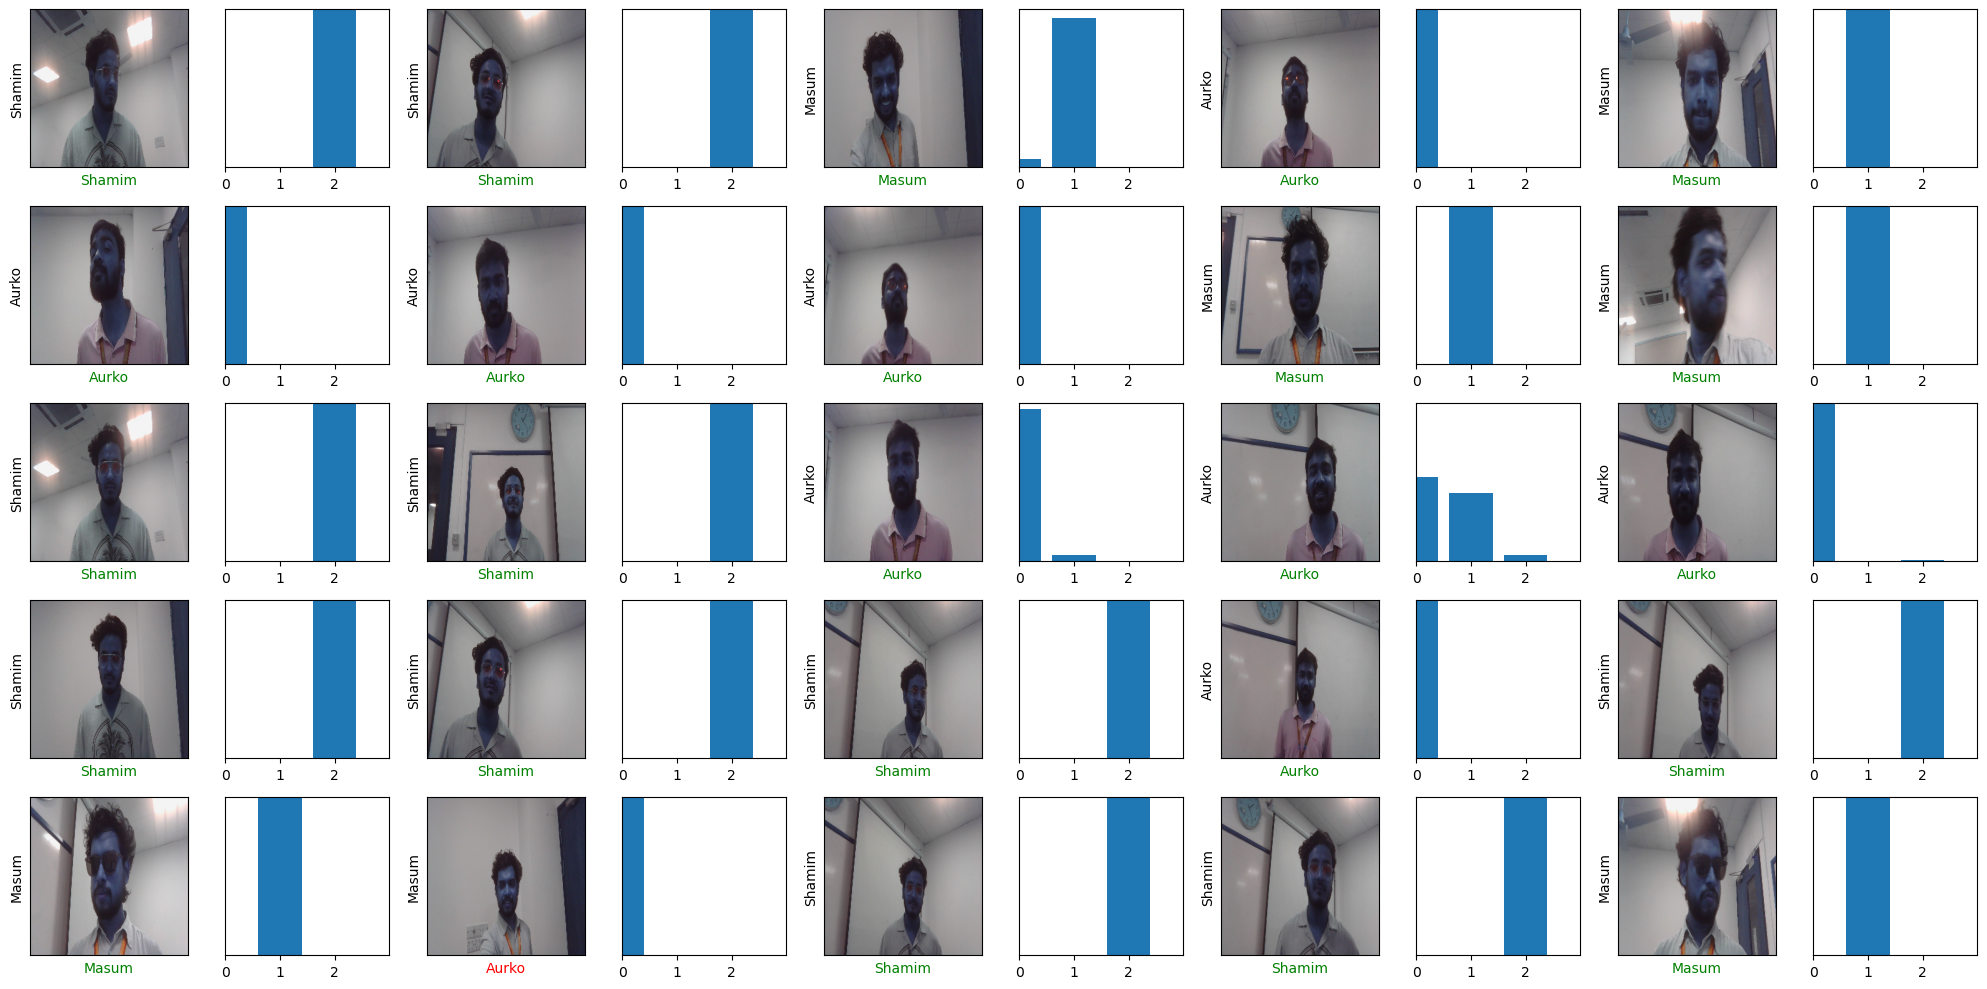

In [18]:
rows = 5
cols = 5

plt.figure(figsize=(20, 10))
for i in range(25):
    plt.subplot(rows, 2 * cols, 2 * i + 1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(CATEGORIES[Y_test[i]])  # <-- fixed

    predicted_class = np.argmax(predictions[i])
    if Y_test[i] == predicted_class:  # <-- fixed
        plt.xlabel(CATEGORIES[predicted_class], color='g')
    else:
        plt.xlabel(CATEGORIES[predicted_class], color='r')

    plt.subplot(rows, 2 * cols, 2 * i + 2)
    plt.bar(range(len(predictions[i])), predictions[i])  # general, not hardcoded to 10
    plt.yticks([])
    plt.xticks(range(len(predictions[i])))
    plt.ylim([0, 1])
    plt.xlim([0, len(predictions[i])])

plt.tight_layout()
plt.show()